In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

KeyboardInterrupt: 

In [ ]:
#Reading data
titanic_data=pd.read_csv('d:\\data\\titanic.csv')
titanic_data.head(5)

In [2]:

print("Number of passanger in original data= " +str(len(titanic_data.index)))


Number of passanger in original data= 891


# Analyzing data

<AxesSubplot:xlabel='Survived', ylabel='count'>

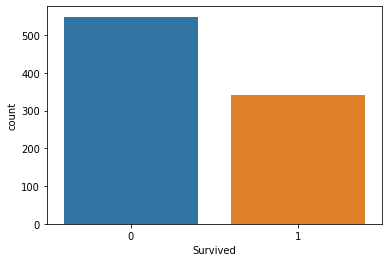

In [3]:
#Analyzing data how many survived (1) and how many died (0)
sns.countplot(x="Survived", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

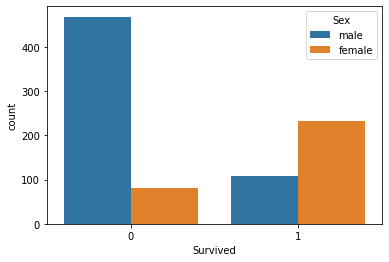

In [4]:
#Analyzing data how many male and female survived (1) and died (0)
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

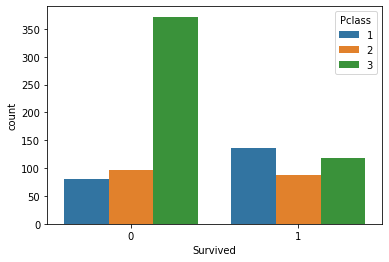

In [5]:
#Analyzing data how many survived (1) and died (0) from passenger class
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)


<AxesSubplot:ylabel='Frequency'>

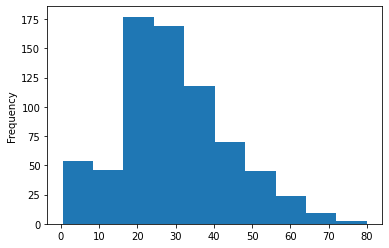

In [6]:
#Analyzing age distribution
titanic_data["Age"].plot.hist()


<AxesSubplot:ylabel='Frequency'>

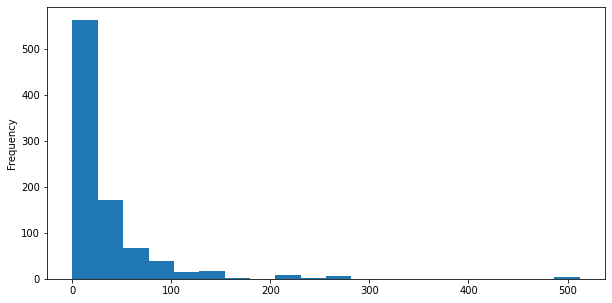

In [7]:
#Analyzing fare distribtion
titanic_data["Fare"].plot.hist(bins=20, figsize=[10,5])

In [8]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

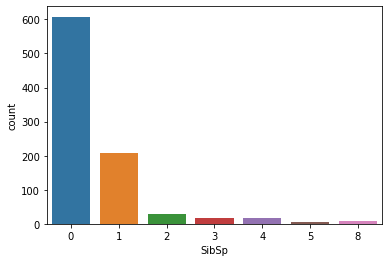

In [9]:
sns.countplot(x="SibSp", data=titanic_data)

# Data Wrangling: Cleaning of data

In [10]:
#Check for any null values in data: isnull() tell as what values are null (tell us missing vlues in dataset) and return result in boolean (True or false)
titanic_data.isnull()


PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [11]:
#check sum of all missing values in each column of data

In [12]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

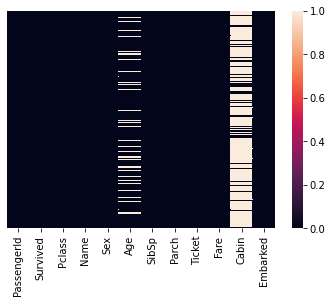

In [13]:
#Analyzing isnull data visually using heatmap
sns.heatmap(titanic_data.isnull(), yticklabels=False)

<AxesSubplot:>

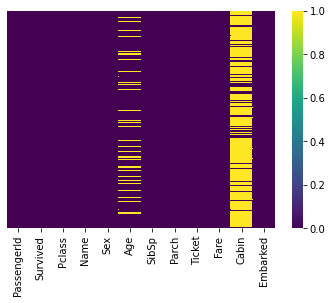

In [14]:
#Analyzing isnull data visually using heatmap colormap
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

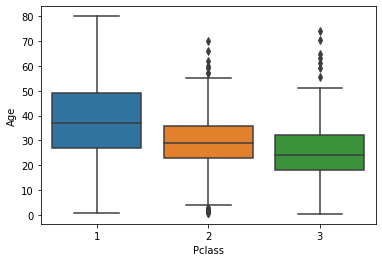

In [15]:
#Boxplot of these missing values
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [16]:
titanic_data.head(10)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [17]:
#Cleaning of missing or null values: either drop the table or remove null values
titanic_data.drop("Cabin", axis=1, inplace=True)

In [18]:
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [19]:
# Drop all the null values
titanic_data.dropna(inplace=True)


<AxesSubplot:>

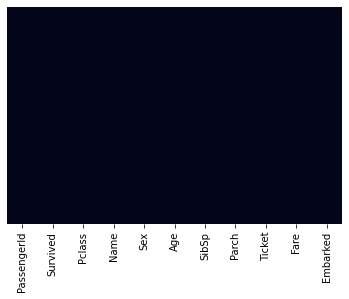

In [20]:
#To check whether data cleaned or not.
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [21]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Converting string to categorial variables in order to perform logistic regression: use panda library for this.

In [22]:
titanic_data.head(10)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   

    Parch            Ticket     Fare Embarked  
0       0         A/5 21171   7.2500        S  
1       0          PC 17599  71.2833        C  
2       0  STON/O2. 3101282   7.9250        S  
3       0            113803  53.1000        S  
4       0            373450   8.0500        S  
6       0             17463  51.8625        S  
7       1            349909  21.0750        S  
8       2            347742  11.1333        S  
9       0            237736  30.0708        C  
10      1           PP 9549  16.7000        S

In [23]:
pd.get_dummies(titanic_data['Sex'])

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
885       1     0
886       0     1
887       1     0
889       0     1
890       0     1

[712 rows x 2 columns]

In [24]:
#So drop the first column in order to make single column
sex=pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)

male
0     1
1     0
2     0
3     0
4     1

In [25]:
embark=pd.get_dummies(titanic_data['Embarked'])
embark.head(5)

C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1

In [26]:
#drop the first column again
embark=pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head(5)

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [27]:
Pcl=pd.get_dummies(titanic_data['Pclass'])
Pcl.head(5)

1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1

In [28]:
#drop the first column again
Pcl=pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pcl.head(5)

2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1

In [29]:
#Join all these new column in the dataset using pandas library
titanic_data=pd.concat([titanic_data,sex,embark,Pcl], axis=1)
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  2  3  
0      0         A/5 21171   7.2500        S     1  0  1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  0  1  
3      0            113803  53.1000        S     0  0  1  0  0  
4      0            373450   8.0500        S     1  0  1  0  1

In [30]:
#Now drop all previous column from dataset i.e. Sex, Embarked, Pclass..., even drop PassengerID, Name.
titanic_data.drop(['Sex','Embarked','Pclass','PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [31]:
# Now print final dataset
titanic_data.head(5)

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0
2         1  26.0      0      0   7.9250     0  0  1  0  1
3         1  35.0      1      0  53.1000     0  0  1  0  0
4         0  35.0      0      0   8.0500     1  0  1  0  1

# Train and Test dataset

In [32]:
# Define independent and dependent variables, x as independent wherease y as dependent or predicted variable.
X=titanic_data.drop("Survived", axis=1)
y=titanic_data["Survived"]



In [33]:
#split dataset into training and testing
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [34]:
# Press shift+tab to see documentation of train_test_split i.e. type train_test_split (than Shift+tab)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
# create the model
from sklearn.linear_model import LogisticRegression

In [36]:
#Create instances of logisticeRegression Model
logmodel=LogisticRegression()

In [37]:
# Now fit the model
logmodel.fit(X_train, y_train)

c:\users\amitiy\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
#Make predictions
predictions=logmodel.predict(X_test)

# Accuracy of the model

In [39]:
from sklearn.metrics import classification_report

In [40]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [41]:
# Accuracy using confusion matrix
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test, predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [43]:
# to find the accuracy % of model
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, predictions)

0.7710280373831776